In [1]:
import torch
from torch import nn, optim
from matplotlib import pyplot as plt
from res.plot_lib import set_default

In [2]:
# Set style (needs to be in a new cell)
set_default(figsize=(16, 8))

In [3]:
# Training set
m = 20  # nb of training pairs
x = (torch.rand(m) - 0.5) * 12  # inputs, sampled from -5 to +5
y = x * torch.sin(x)  # targets

(-10, 5)

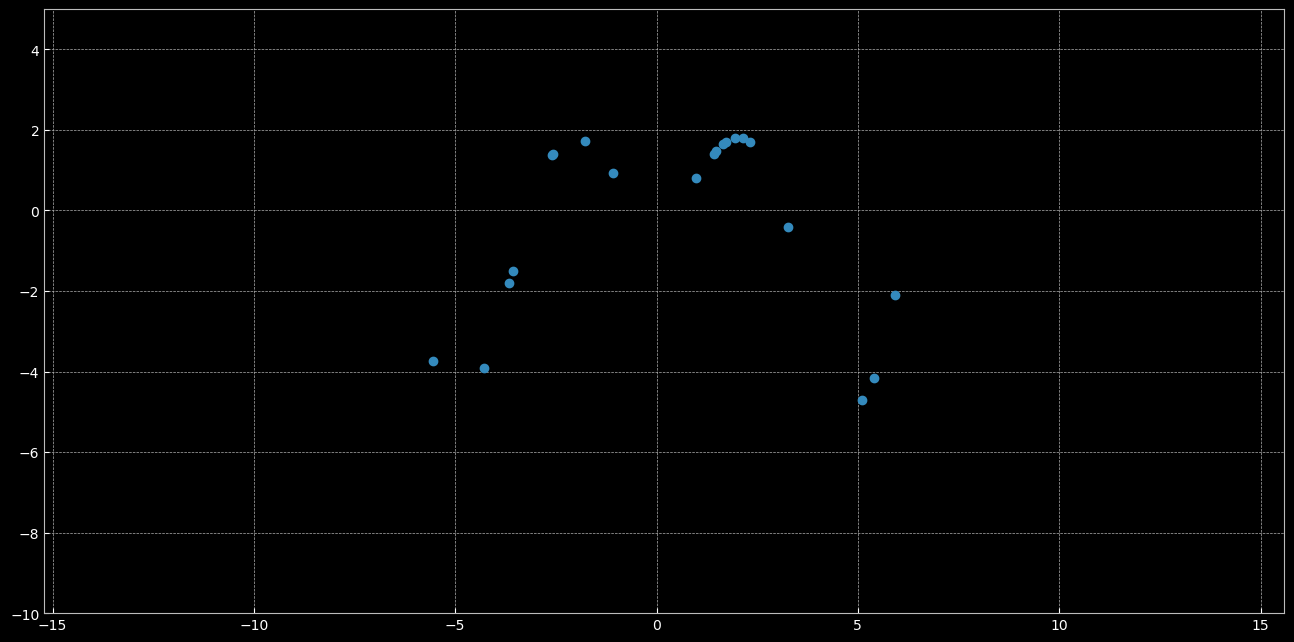

In [4]:
# View training points
plt.plot(x.numpy(), y.numpy(), 'o')
plt.axis('equal')
plt.ylim([-10, 5])

In [5]:
# Define network architecture (try different non-linearities)

non_linear = nn.Tanh
non_linear = nn.ReLU

net = nn.Sequential(
    nn.Dropout(p=0.05),
    nn.Linear(1, 20),
    non_linear(),
    nn.Dropout(p=0.05),
    nn.Linear(20, 20),
    non_linear(),
    nn.Linear(20, 1)
)

In [6]:
# Training objective and optimiser
criterion = nn.MSELoss()
optimiser = optim.SGD(net.parameters(), lr=0.01, weight_decay=0.00001)

In [7]:
# Training loop
for epoch in range(1000):
    y_hat = net(x.view(-1, 1))
    loss = criterion(y_hat, y.view(-1, 1))
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
#     print(loss.item())

In [8]:
# Define a denser input range
xx = torch.linspace(-15, 15, 1000)

(-10, 5)

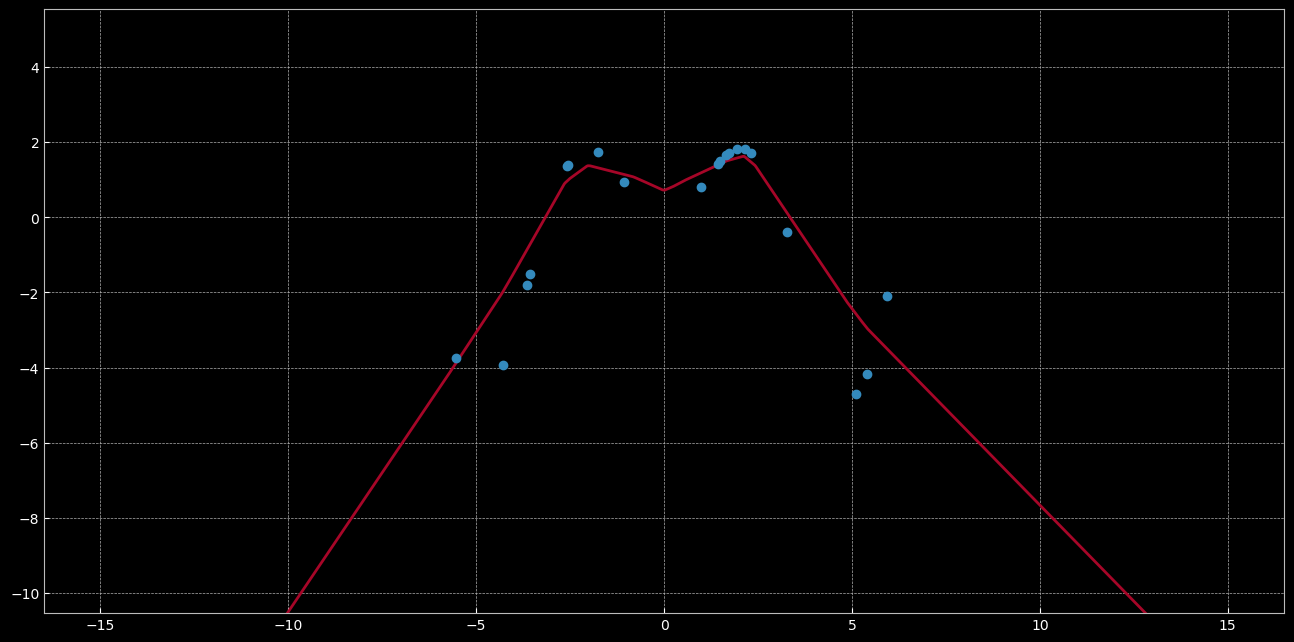

In [9]:
# Evaluate net over denser input (try both eval() and train() modes)

net.eval()
# net.train()

with torch.no_grad():
    plt.plot(xx.numpy(), net(xx.view(-1, 1)).squeeze().numpy(), 'C1')
plt.plot(x.numpy(), y.numpy(), 'oC0')
plt.axis('equal')
plt.ylim([-10, 5])

In [10]:
# Multiple (100) runs for denser input
net.train()
y_hat = list()
with torch.no_grad():
    for t in range(100):
        y_hat.append(net(xx.view(-1, 1)).squeeze())

In [11]:
# Evaluate mean and std over denser input
y_hat = torch.stack(y_hat)
mean = y_hat.mean(0)
std = y_hat.std(0)

(-10, 5)

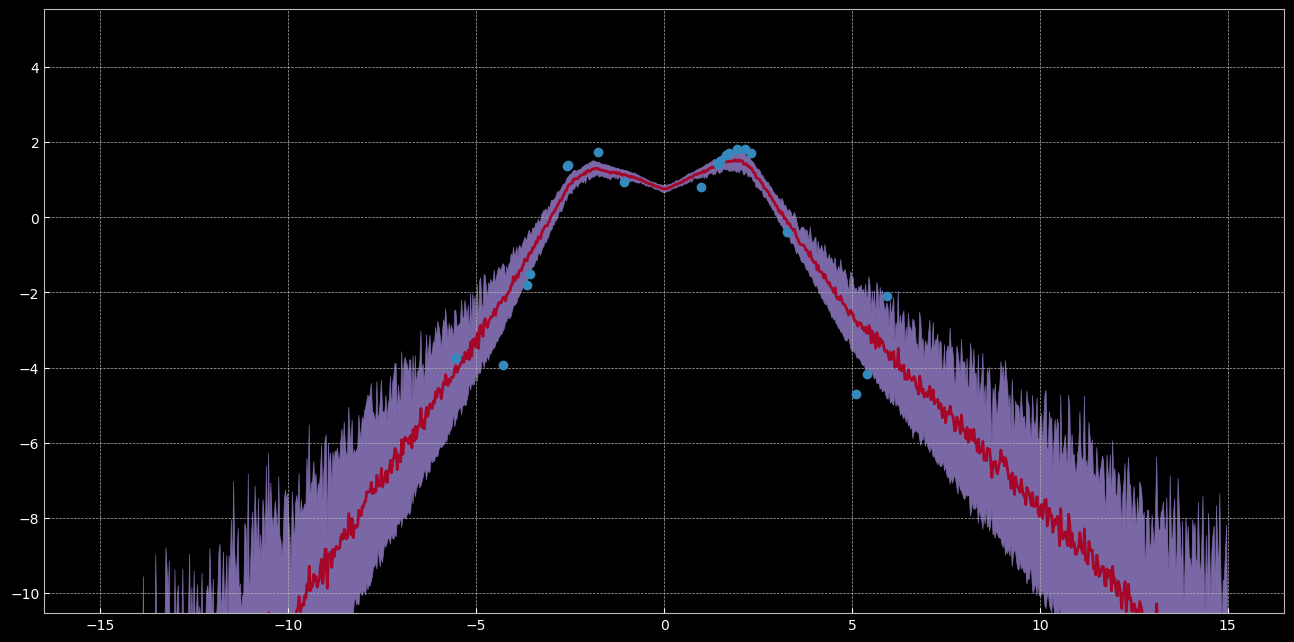

In [12]:
# Visualise mean and mean ± std -> confidence range
plt.plot(xx.numpy(), mean.numpy(), 'C1')
plt.fill_between(xx.numpy(), (mean + std).numpy(), (mean - std).numpy(), color='C2')
plt.plot(x.numpy(), y.numpy(), 'oC0')
plt.axis('equal')
plt.ylim([-10, 5])